# Visualize travel time to cities and ports in the year 2015 maps

This notebook shows how to read and visualize travel time to cities and ports maps. These maps represent a unique global representation of physical access to essential services offered by cities and ports. 

Each accessibility layer is a 30 arc-second resolution raster in WGS84 (coordinate reference system EPSG:4326) projection with a bounding box of 85°N, 180°E, 60°S and 180°W. The format is single band GeoTIFF, 16 bit unsigned integer with 65,535 as the nodata value. The pixel values represent the time in minutes from that pixel to the nearest settlement (Table 3). Travel times are reported for all pixels classified as land or inland water areas.

More information on travel time to cities and ports in the year 2015 can be found at https://doi.org/10.6084/m9.figshare.7638134.v3


So let's start with installing the required packages.

In [2]:
!pip install matplotlib
!pip install pillow
!pip install numpy
!pip install opencv-python


Load the travel time maps

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

path = "data"
maps_list=[[5000000,50000000],[1000000,5000000],[500000,1000000],[200000,500000],[100000,200000],[50000,100000],[20000,50000],[10000,20000],[5000,10000]]

def getmaps(path):
    n = 0
    for file in os.listdir(path):
        
        maps_list[n].append(file)
        n = n+1

getmaps(path)

maps_names = ["Travel_Time_to_Cities_5000000-50000000" , "Travel_Time_to_Cities_1000000-5000000" , "Travel_Time_to_Cities_500000-1000000" , "Travel_Time_to_Cities_200000-500000" , "Travel_Time_to_Cities_100000-200000" , "Travel_Time_to_Cities_50000-100000" , "Travel_Time_to_Cities_20000-50000" , "Travel_Time_to_Cities_10000-20000" , "Travel_Time_to_Cities_5000-10000"]
maps_list

[[5000000, 50000000, 'travel_time_to_cities_1.tif'],
 [1000000, 5000000, 'travel_time_to_cities_2.tif'],
 [500000, 1000000, 'travel_time_to_cities_3.tif'],
 [200000, 500000, 'travel_time_to_cities_4.tif'],
 [100000, 200000, 'travel_time_to_cities_5.tif'],
 [50000, 100000, 'travel_time_to_cities_6.tif'],
 [20000, 50000, 'travel_time_to_cities_7.tif'],
 [10000, 20000, 'travel_time_to_cities_8.tif'],
 [5000, 10000, 'travel_time_to_cities_9.tif']]

Show the travel time maps

In [ ]:
def show_Maps(maps_list,maps_names):
    for i in range(len(maps_list)):
        j = i+1
        plt.figure(j)
        plt.imshow(Image.open(os.path.join(path,maps_list[i][2])))
        plt.axis('off')
        plt.title(maps_names[i])
show_Maps(maps_list,maps_names)

# Combination of different layers

The nine layers represent travel times to human settlements of different population ranges.
In the following code, change the minimum and maximum population you would like to create a new travel time map.

In [4]:
import numpy as np 
Min_Population = input("choose the minimum population")
Max_Population = input("choose the maximum population")

target_maps_list = []
target_maps_names =[]
for i in range (len(maps_list)):
     if  int(Min_Population) <= int(maps_list[i][0]) < int(Max_Population):
         target_maps_list.append(maps_list[i])
         target_maps_names.append(maps_names[i])

target_maps_list


[[20000, 50000, 'travel_time_to_cities_7.tif'],
 [10000, 20000, 'travel_time_to_cities_8.tif'],
 [5000, 10000, 'travel_time_to_cities_9.tif']]

Get the minimum of the travel time between the selected maps

In [5]:
import cv2
import numpy as np 

def get_geoinfo(filepath):
    sourceds = Image.open(os.path.join(path,filepath))
    width, height = sourceds.size
    return width, height

width, height = get_geoinfo(target_maps_list[0][2])


maps = np.zeros((height,width,3,len(target_maps_list)), np.uint16)

for i in range(len(target_maps_list)):
    maps[:,:,:, i] = cv2.imread(os.path.join(path,target_maps_list[i][2]))



In [6]:
map = maps.min(axis=3)

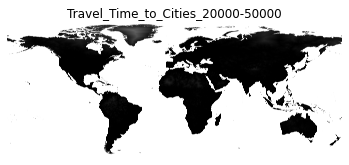

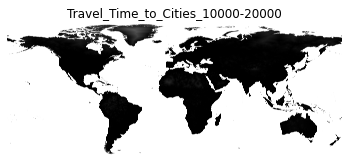

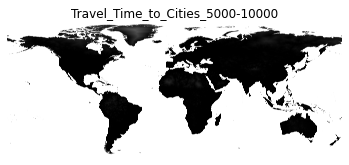

In [7]:
for i in range(len(target_maps_list)):
        j = i+1
        plt.figure(j)
        plt.imshow(maps[:, :, :, i])
        plt.axis('off')
        plt.title(target_maps_names[i])


Text(0.5, 1.0, 'Travel_time_to_cities_5000_50000')

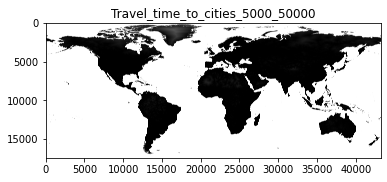

In [8]:
plt.figure(len(target_maps_list)+1)
plt.imshow(map)
plt.title('Travel_time_to_cities_' + Min_Population + '_' + Max_Population)

Check if the final map contains the minimum value

In [ ]:
# check if it works correctly
x, y = 1000, 17000
print(map[x][y])
print(maps[:, :, :, 0][x][y])
print(maps[:, :, :, 1][x][y])
print(maps[:, :, :, 2][x][y])